# import libraries

In [1]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

<IPython.core.display.Javascript object>

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(suppress=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Loading Data

In [4]:
# read csv file using pandas
vehicle = pd.read_csv('Vehicle.csv')

# display the top 5 rows of the dataframe
vehicle.head()


<IPython.core.display.Javascript object>

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


# EDA - Exploratory Data Analysis

In [5]:
vehicle.shape

(398, 9)

In [6]:
vehicle.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [7]:
vehicle.nunique()

origin                   3
cylinders                5
displacement            82
horsepower              94
weight                 351
acceleration            95
year                    13
name                   305
Kilometer_per_liter    129
dtype: int64

In [8]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
#checking dtypes and convert into right format
#remove irrelevant features/unique features/redudndant features
vehicle.drop('name',axis=1,inplace=True)

In [10]:
vehicle['horsepower'] = pd.to_numeric(vehicle['horsepower'],errors='coerce')

<IPython.core.display.Javascript object>

In [11]:
vehicle[['origin','cylinders','year']]=vehicle[['origin','cylinders','year']].astype('str')

In [12]:
vehicle.dtypes

origin                  object
cylinders               object
displacement           float64
horsepower             float64
weight                   int64
acceleration           float64
year                    object
Kilometer_per_liter    float64
dtype: object

In [13]:
vehicle.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
origin,398,3,1,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,398,5,4,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
displacement,398,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455
horsepower,392,NaN,NaN,NaN,104.469,38.4912,46,75,93.5,126,230
weight,398,NaN,NaN,NaN,2970.42,846.842,1613,2223.75,2803.5,3608,5140
acceleration,398,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8
year,398,13,1973,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kilometer_per_liter,398,NaN,NaN,NaN,9.99707,3.32292,3.82629,7.44001,9.77831,12.3292,19.8117


In [14]:
vehicle.describe(include='object').T

,count,unique,top,freq
origin,398,3,1,249
cylinders,398,5,4,204
year,398,13,1973,40


In [15]:
vehicle.describe(include='int64').T

,count,mean,std,min,25%,50%,75%,max
weight,398.0,2970.424623,846.841774,1613.0,2223.75,2803.5,3608.0,5140.0


In [16]:
vehicle.describe(include='float').T

,count,mean,std,min,25%,50%,75%,max
displacement,398.0,193.425879,104.269838,68.000000,104.250000,148.500000,262.000000,455.000000
horsepower,392.0,104.469388,38.491160,46.000000,75.000000,93.500000,126.000000,230.000000
acceleration,398.0,15.568090,2.757689,8.000000,13.825000,15.500000,17.175000,24.800000
Kilometer_per_liter,398.0,9.997073,3.322917,3.826293,7.440015,9.778305,12.329168,19.811697


In [17]:
vehicle.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             6
weight                 0
acceleration           0
year                   0
Kilometer_per_liter    0
dtype: int64

In [18]:
#seperate numerical data
veh_num=vehicle.select_dtypes(np.number)

<IPython.core.display.Javascript object>

In [19]:
veh_num.drop('Kilometer_per_liter',axis=1,inplace=True)

In [20]:
veh_num.isin([0]).sum()

displacement    0
horsepower      0
weight          0
acceleration    0
dtype: int64

In [21]:
#seperate categorical data
veh_cat=vehicle.select_dtypes('object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

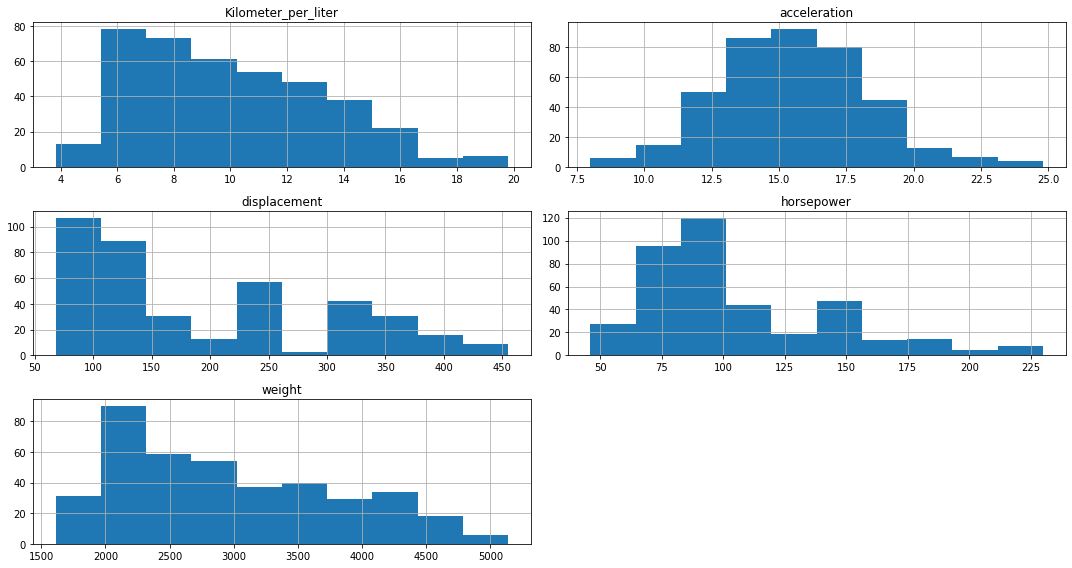

In [22]:
#plotting numerical datas
vehicle.hist()
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

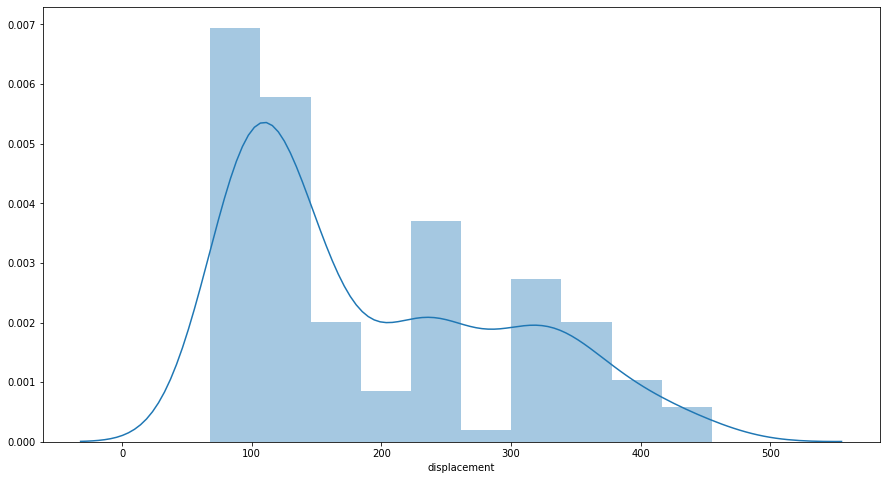

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

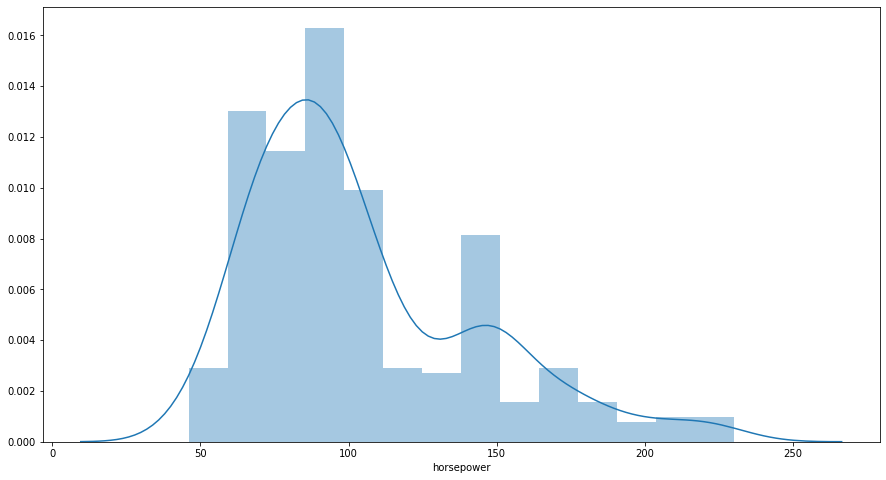

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

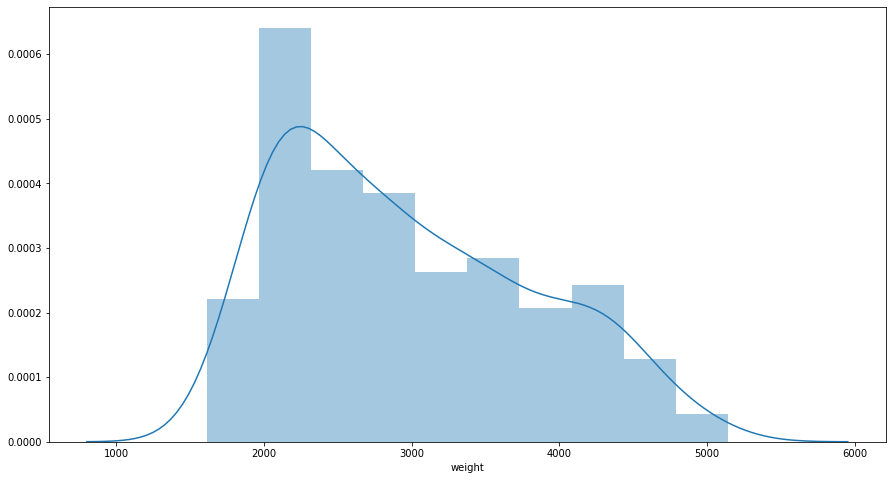

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

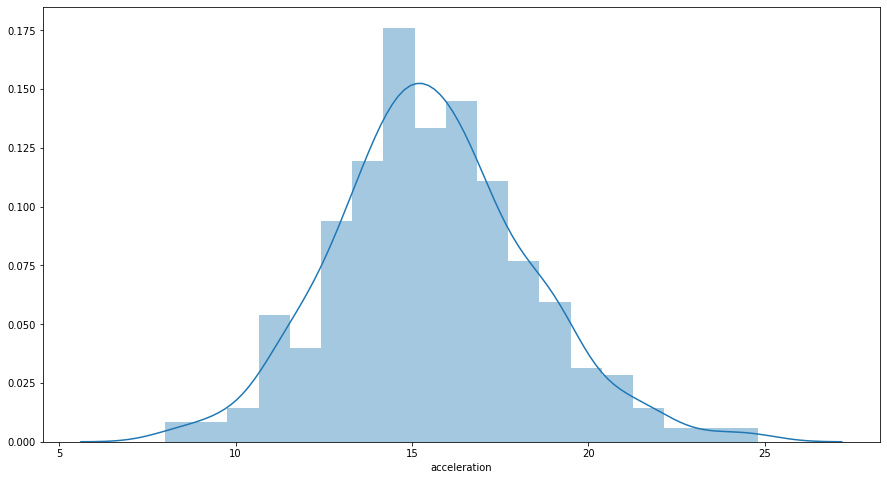

In [23]:
for i in veh_num.columns:
    sns.distplot(vehicle[i],hist=True)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

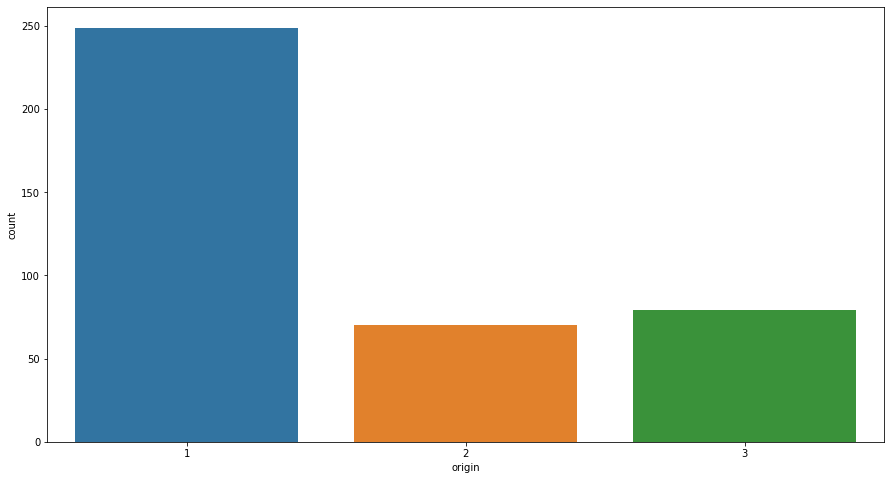

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

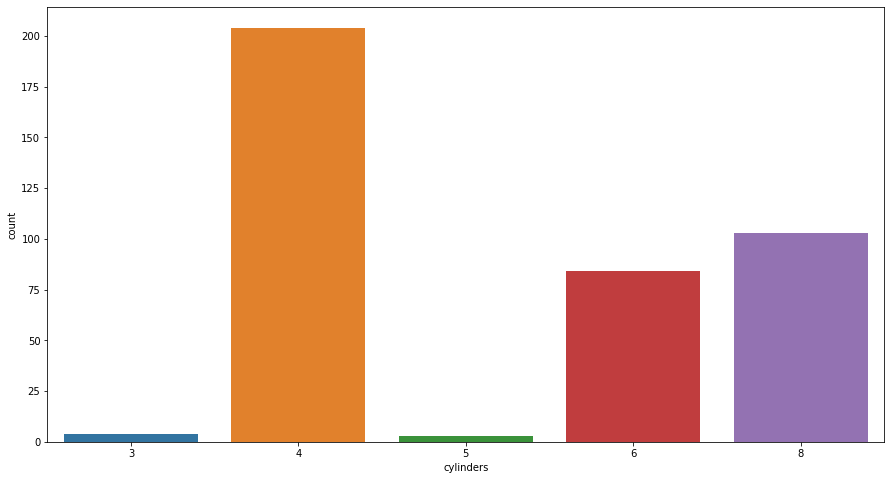

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

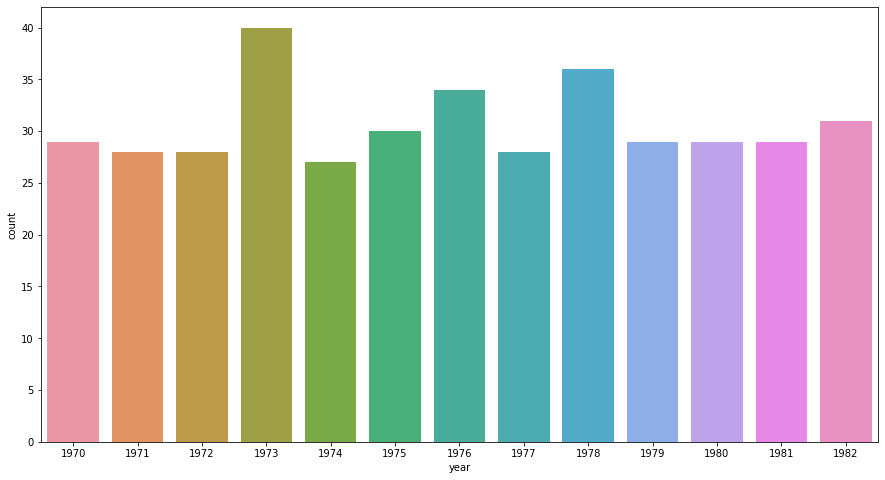

In [24]:
#categorical
for i in veh_cat.columns:
    sns.countplot(vehicle[i])
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

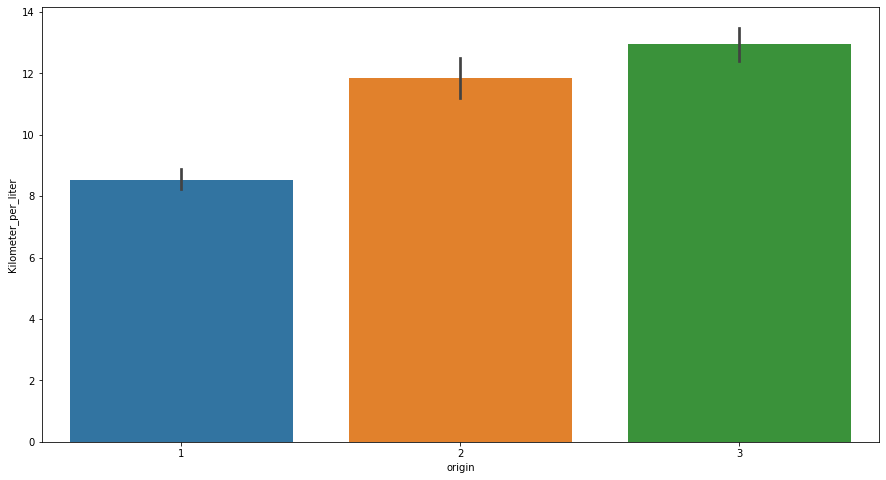

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

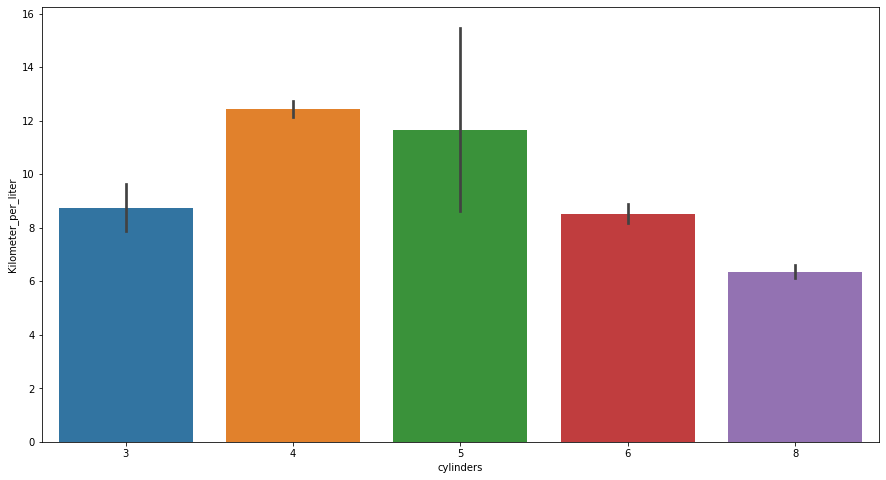

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

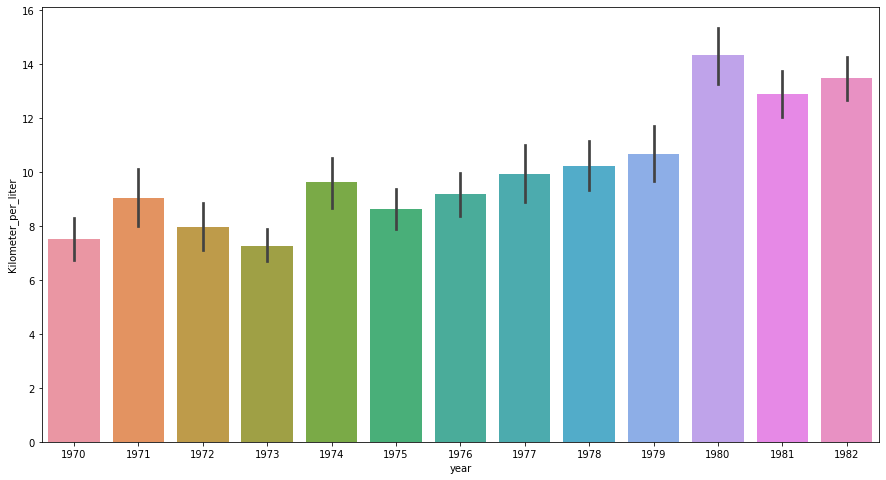

In [25]:
#categorical
for i in veh_cat.columns:
    sns.barplot(vehicle[i],vehicle['Kilometer_per_liter'])
    plt.show()

<IPython.core.display.Javascript object>

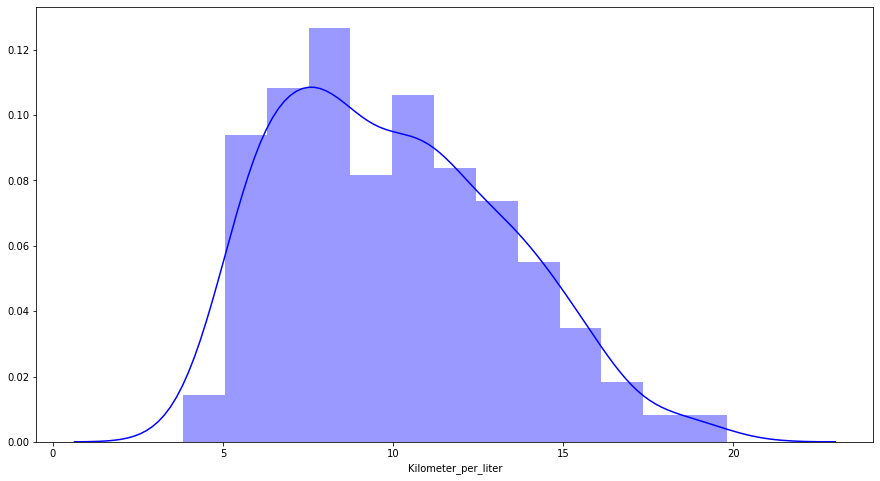

In [26]:
#target variable
sns.distplot(vehicle['Kilometer_per_liter'],color='b',kde=True, norm_hist=True)

<IPython.core.display.Javascript object>

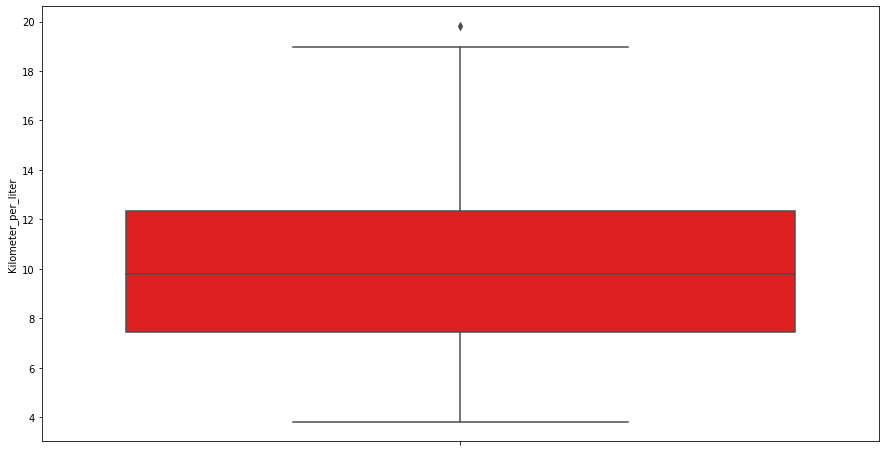

In [27]:
#checking outliers
sns.boxplot(vehicle['Kilometer_per_liter'],color='r',orient='v')

<IPython.core.display.Javascript object>

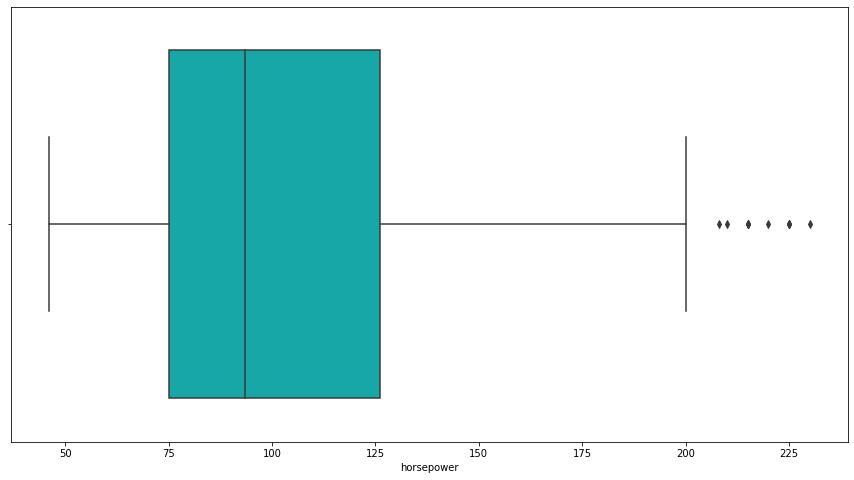

In [28]:
#handling missing values
sns.boxplot(veh_num['horsepower'],color='c')

In [29]:
#directly check mean
veh_num['horsepower'].mean()

104.46938775510205

In [30]:
#checking by considering outliers
veh_num['horsepower'].max()

230.0

In [31]:
true_index = (veh_num['horsepower'].values < 230)

In [32]:
mean_hp = np.mean(veh_num['horsepower'].values[true_index])

<IPython.core.display.Javascript object>

In [33]:
mean_hp

104.14833759590793

In [34]:
#missing values filled with mean == 104.4693
veh_num['horsepower']=veh_num['horsepower'].fillna(veh_num['horsepower'].mean())

<IPython.core.display.Javascript object>

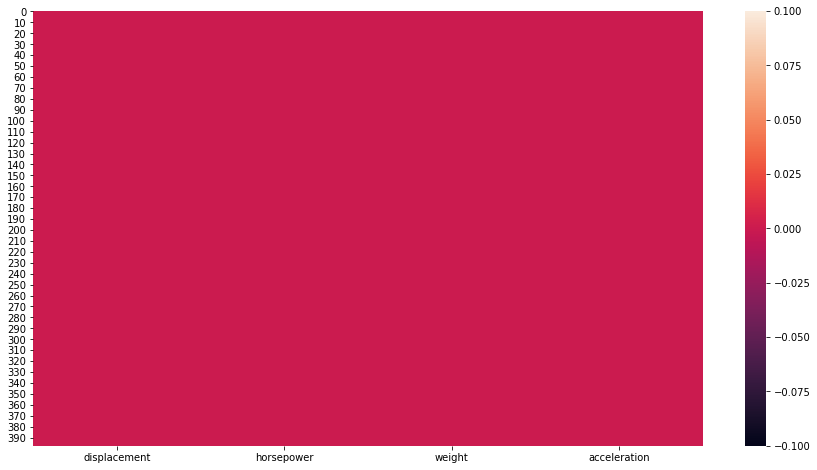

In [35]:
sns.heatmap(veh_num.isnull())

<IPython.core.display.Javascript object>

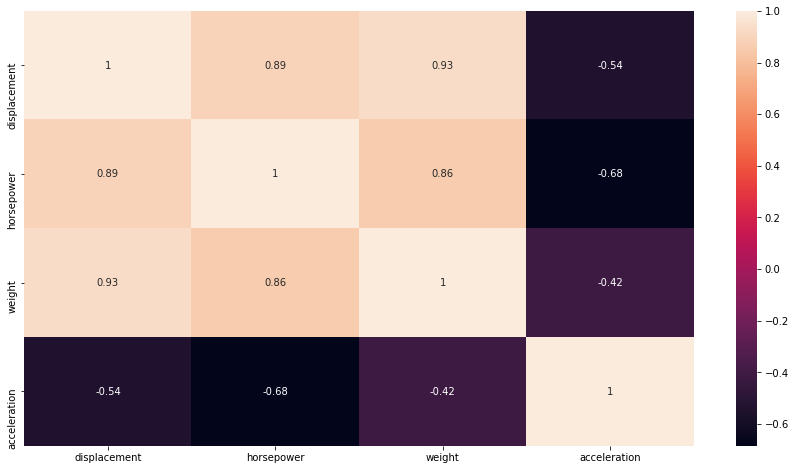

In [36]:
#correlation
sns.heatmap(veh_num.corr(),annot=True)

In [37]:
veh_num.columns

Index(['displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')

In [38]:
#treating skewness by using transformation and normalisation
veh_num[['displacement', 'horsepower', 'weight']]=np.log(veh_num[['displacement', 'horsepower', 'weight']])

<IPython.core.display.Javascript object>

In [39]:
df_norm=veh_num[['displacement', 'horsepower', 'weight']]
norm=((df_norm-df_norm.mean())/(df_norm.max()-df_norm.min())*100)
norm.head()

,displacement,horsepower,weight
0,31.759110,17.315612,17.668498
1,38.655476,32.128922,22.201362
2,33.611163,26.206968,15.977567
3,31.242480,26.206968,15.902198
4,30.895220,21.920200,16.303405


In [40]:
#normally distributed so we have to use standardisation
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
arr_acc=np.array(veh_num['acceleration']).reshape(-1,1)
veh_num['acceleration']=std.fit_transform(arr_acc)

<IPython.core.display.Javascript object>

In [41]:
#with normalisation and standardisation
num_new=pd.concat([veh_num['acceleration'],norm],axis=1)
num_new.head()

<IPython.core.display.Javascript object>

,acceleration,displacement,horsepower,weight
0,-1.295498,31.759110,17.315612,17.668498
1,-1.477038,38.655476,32.128922,22.201362
2,-1.658577,33.611163,26.206968,15.977567
3,-1.295498,31.242480,26.206968,15.902198
4,-1.840117,30.895220,21.920200,16.303405


In [42]:
#dummy variables
veh_cat_dummy=pd.get_dummies(veh_cat,drop_first=True)
veh_cat_dummy.head()

<IPython.core.display.Javascript object>

,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
#new combined data with num and categorical datas
vehicle_new=pd.concat([veh_cat_dummy,num_new],axis=1)
vehicle_new.head()

<IPython.core.display.Javascript object>

,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,acceleration,displacement,horsepower,weight
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1.295498,31.759110,17.315612,17.668498
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1.477038,38.655476,32.128922,22.201362
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1.658577,33.611163,26.206968,15.977567
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1.295498,31.242480,26.206968,15.902198
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1.840117,30.895220,21.920200,16.303405


In [44]:
vehicle_new.shape

(398, 22)

In [45]:
#predictors and target
x=vehicle_new
y=vehicle['Kilometer_per_liter']

In [46]:
import statsmodels.api as sm
x1 = sm.add_constant(x)
y1=(vehicle['Kilometer_per_liter'])

In [47]:
#splitting into train ans test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

In [48]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((318, 23), (80, 23), (318,), (80,))

In [49]:
x_train.shape,x_test.shape

((318, 23), (80, 23))

# MODEL1 WITH TRANSFORMATION

In [50]:
#ols model
from statsmodels.api import OLS
ols=sm.OLS(y_train,x_train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.887
Model:                             OLS   Adj. R-squared:                  0.878
Method:                  Least Squares   F-statistic:                     105.0
Date:                 Fri, 01 Jan 2021   Prob (F-statistic):          1.80e-125
Time:                         18:46:38   Log-Likelihood:                -484.69
No. Observations:                  318   AIC:                             1015.
Df Residuals:                      295   BIC:                             1102.
Df Model:                           22                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.4780      0.850      6.448      0.000       3.806       7.150
origin_2         0.4587      0.242      1.893      0.059      -0.018       0.936
origin_3         0.6727      0.238      2.832      0.005       0.205       1.140
cylinders_4      2.8477      0.768      3.709      0.000       1.337       4.359
cylinders_5      3.2814      1.068      3.073      0.002       1.180       5.383
cylinders_6      2.8716      0.895      3.210      0.001       1.111       4.632
cylinders_8      3.9854      0.979      4.071      0.000       2.059       5.912
year_1971        0.2546      0.373      0.684      0.495      -0.479       0.988
year_1972       -0.0050      0.385     -0.013      0.990      -0.764       0.754
year_1973       -0.2751      0.348     -0.789      0.430      -0.961       0.411
year_1974        0.2772      0.398      0.697      0.487      -0.506       1.060
year_1975        0.3864      0.395      0.979      0.329      -0.391       1.163
year_1976        0.4260      0.373      1.142      0.254      -0.308       1.160
year_1977        1.2873      0.385      3.345      0.001       0.530       2.045
year_1978        1.1651      0.359      3.241      0.001       0.458       1.873
year_1979        1.8987      0.388      4.888      0.000       1.134       2.663
year_1980        3.6344      0.409      8.894      0.000       2.830       4.439
year_1981        2.8825      0.407      7.083      0.000       2.082       3.683
year_1982        3.2375      0.393      8.238      0.000       2.464       4.011
acceleration    -0.1401      0.120     -1.166      0.245      -0.377       0.096
displacement    -0.0196      0.013     -1.469      0.143      -0.046       0.007
horsepower      -0.0446      0.011     -4.212      0.000      -0.065      -0.024
weight          -0.0540      0.012     -4.523      0.000      -0.078      -0.031
==============================================================================
Omnibus:                       42.878   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.271
Skew:                           0.637   Prob(JB):                     1.87e-24
Kurtosis:                       5.574   Cond. No.                     1.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
y_pred=ols.predict(x_test)

In [52]:
from sklearn import metrics
cols = ['model_name','RMSE', 'R-Squared', 'Adj. R-Squared']
result_tabulation = pd.DataFrame(columns = cols)

<IPython.core.display.Javascript object>

In [53]:
def models(model_name,y_pred,models_name):
    metricss = pd.Series({'model_name':str(models_name),
                     'RMSE':metrics.mean_squared_error(y_pred,y_test),
                     'R-Squared':model_name.rsquared,
                     'Adj. R-Squared': model_name.rsquared_adj})
    return metricss

In [54]:
result_tabulation=result_tabulation.append(models(ols,y_pred,'OLS_WITH_LOG'),ignore_index = True)

<IPython.core.display.Javascript object>

In [55]:
result_tabulation

,model_name,RMSE,R-Squared,Adj. R-Squared
0,OLS_WITH_LOG,1.161455,0.88672,0.878272


# MODEL 2 WITHOUT LOG TRANSFORMATIOON

In [56]:
vehicle['horsepower']=vehicle['horsepower'].fillna(vehicle['horsepower'].mean())

In [57]:
vehicle_num=vehicle.select_dtypes(np.number)
vehicle_cat=vehicle.select_dtypes(include='object')

<IPython.core.display.Javascript object>

In [58]:
cat_dum=pd.get_dummies(vehicle_cat,drop_first=True)

<IPython.core.display.Javascript object>

In [59]:
veh_main=pd.concat([vehicle_num,cat_dum,vehicle['Kilometer_per_liter']],axis=1)
veh_main.head()

<IPython.core.display.Javascript object>

,displacement,horsepower,weight,acceleration,Kilometer_per_liter,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,Kilometer_per_liter
0,307.0,130.0,3504,12.0,7.652587,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7.652587
1,350.0,165.0,3693,11.5,6.377156,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6.377156
2,318.0,150.0,3436,11.0,7.652587,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7.652587
3,304.0,150.0,3433,12.0,6.802299,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6.802299
4,302.0,140.0,3449,10.5,7.227443,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7.227443


In [60]:
veh_main = sm.add_constant(veh_main)
x=veh_main.drop('Kilometer_per_liter',axis=1)
y=vehicle['Kilometer_per_liter']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [61]:
from statsmodels.api import OLS
ols_withoutlog=sm.OLS(y_train,x_train).fit()
ols_withoutlog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.868
Model:                             OLS   Adj. R-squared:                  0.858
Method:                  Least Squares   F-statistic:                     88.37
Date:                 Fri, 01 Jan 2021   Prob (F-statistic):          6.93e-116
Time:                         18:46:38   Log-Likelihood:                -508.71
No. Observations:                  318   AIC:                             1063.
Df Residuals:                      295   BIC:                             1150.
Df Model:                           22                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.7280      1.181     10.780      0.000      10.404      15.052
displacement     0.0062      0.003      1.841      0.067      -0.000       0.013
horsepower      -0.0157      0.006     -2.575      0.011      -0.028      -0.004
weight          -0.0024      0.000     -7.994      0.000      -0.003      -0.002
acceleration     0.0521      0.042      1.248      0.213      -0.030       0.134
origin_2         0.8970      0.246      3.642      0.000       0.412       1.382
origin_3         1.1452      0.239      4.795      0.000       0.675       1.615
cylinders_4      2.4039      0.775      3.102      0.002       0.879       3.929
cylinders_5      2.4793      1.100      2.253      0.025       0.314       4.645
cylinders_6      1.5376      0.854      1.800      0.073      -0.143       3.218
cylinders_8      2.4969      0.980      2.547      0.011       0.568       4.426
year_1971        0.4639      0.412      1.125      0.261      -0.347       1.275
year_1972        0.1191      0.420      0.284      0.777      -0.707       0.945
year_1973       -0.1509      0.380     -0.397      0.692      -0.899       0.597
year_1974        0.6427      0.436      1.475      0.141      -0.215       1.500
year_1975        0.5853      0.434      1.348      0.179      -0.270       1.440
year_1976        0.6515      0.410      1.588      0.113      -0.156       1.459
year_1977        1.5138      0.422      3.589      0.000       0.684       2.344
year_1978        1.2627      0.393      3.212      0.001       0.489       2.037
year_1979        1.9098      0.429      4.453      0.000       1.066       2.754
year_1980        3.8034      0.441      8.624      0.000       2.935       4.671
year_1981        3.1591      0.442      7.155      0.000       2.290       4.028
year_1982        3.3860      0.429      7.888      0.000       2.541       4.231
==============================================================================
Omnibus:                       34.240   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.208
Skew:                           0.626   Prob(JB):                     5.12e-14
Kurtosis:                       4.747   Cond. No.                     8.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
y_pred=ols_withoutlog.predict(x_test)


In [63]:
ols_without=models(ols_withoutlog,y_pred,'OLS WITHOUT LOG')
result_tabulation=result_tabulation.append(ols_without,ignore_index=True)

<IPython.core.display.Javascript object>

In [64]:
result_tabulation

,model_name,RMSE,R-Squared,Adj. R-Squared
0,OLS_WITH_LOG,1.161455,0.88672,0.878272
1,OLS WITHOUT LOG,1.429391,0.86825,0.858424


# WITH VIF

In [65]:
veh_main.head()

,const,displacement,horsepower,weight,acceleration,Kilometer_per_liter,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,Kilometer_per_liter
0,1.0,307.0,130.0,3504,12.0,7.652587,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7.652587
1,1.0,350.0,165.0,3693,11.5,6.377156,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6.377156
2,1.0,318.0,150.0,3436,11.0,7.652587,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7.652587
3,1.0,304.0,150.0,3433,12.0,6.802299,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6.802299
4,1.0,302.0,140.0,3449,10.5,7.227443,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7.227443


In [66]:
vehicle_num.head()

,displacement,horsepower,weight,acceleration,Kilometer_per_liter
0,307.0,130.0,3504,12.0,7.652587
1,350.0,165.0,3693,11.5,6.377156
2,318.0,150.0,3436,11.0,7.652587
3,304.0,150.0,3433,12.0,6.802299
4,302.0,140.0,3449,10.5,7.227443


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
vehicle_num.drop('Kilometer_per_liter', axis=1,inplace=True)

In [69]:
vehicle_num.shape[1]

4

In [70]:
for ind in range(len(vehicle_num.columns)):
    vif=pd.DataFrame()
    vif['features']=vehicle_num.columns
    vif['vif_value']=[variance_inflation_factor(vehicle_num.values,i) for i in range(vehicle_num.shape[1])]
    multi = vif[vif['vif_value'] > 10]
    if(multi.empty == False):
        df_sorted = multi.sort_values(by ='vif_value',ascending = False)
    else:
        print(vif)
        break      
    if (df_sorted.empty == False):
        vehicle_num = vehicle_num.drop(df_sorted.features.iloc[0],axis=1)
    else:
        print(vif)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

       features  vif_value
0  displacement   3.085497
1  acceleration   3.085497


In [71]:
x=pd.concat([vehicle_num[['displacement','acceleration']],cat_dum],axis=1)
y=vehicle['Kilometer_per_liter']

<IPython.core.display.Javascript object>

In [72]:
x = sm.add_constant(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [73]:
ols_with_vif=sm.OLS(y_train,x_train).fit()
ols_with_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.815
Model:                             OLS   Adj. R-squared:                  0.802
Method:                  Least Squares   F-statistic:                     65.28
Date:                 Fri, 01 Jan 2021   Prob (F-statistic):           4.08e-96
Time:                         18:46:39   Log-Likelihood:                -562.97
No. Observations:                  318   AIC:                             1168.
Df Residuals:                      297   BIC:                             1247.
Df Model:                           20                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.1932      1.170      7.004      0.000       5.891      10.495
displacement    -0.0183      0.003     -6.190      0.000      -0.024      -0.012
acceleration     0.0196      0.039      0.502      0.616      -0.057       0.096
origin_2         0.4646      0.287      1.619      0.107      -0.100       1.029
origin_3         1.1274      0.279      4.048      0.000       0.579       1.676
cylinders_4      4.0175      0.899      4.467      0.000       2.248       5.787
cylinders_5      3.3258      1.294      2.570      0.011       0.779       5.873
cylinders_6      3.1234      0.993      3.146      0.002       1.170       5.077
cylinders_8      3.9803      1.146      3.473      0.001       1.725       6.236
year_1971        0.2586      0.465      0.555      0.579      -0.657       1.175
year_1972       -0.4254      0.479     -0.887      0.376      -1.369       0.518
year_1973       -0.4744      0.434     -1.093      0.275      -1.329       0.380
year_1974        0.0645      0.483      0.134      0.894      -0.886       1.015
year_1975        0.0633      0.476      0.133      0.894      -0.873       1.000
year_1976        0.1627      0.451      0.361      0.719      -0.725       1.051
year_1977        1.0386      0.473      2.196      0.029       0.108       1.969
year_1978        0.8137      0.443      1.836      0.067      -0.059       1.686
year_1979        1.7236      0.481      3.584      0.000       0.777       2.670
year_1980        3.2752      0.486      6.737      0.000       2.318       4.232
year_1981        2.7487      0.486      5.653      0.000       1.792       3.706
year_1982        2.9853      0.481      6.204      0.000       2.038       3.932
==============================================================================
Omnibus:                       40.829   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.005
Skew:                           0.676   Prob(JB):                     3.48e-19
Kurtosis:                       5.142   Cond. No.                     5.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
y_pred=ols_with_vif.predict(x_test)

In [75]:
result_tabulation=result_tabulation.append(models(ols_with_vif,y_pred,'OLS_WITH_VIF'),ignore_index=True)

<IPython.core.display.Javascript object>

In [76]:
result_tabulation

,model_name,RMSE,R-Squared,Adj. R-Squared
0,OLS_WITH_LOG,1.161455,0.886720,0.878272
1,OLS WITHOUT LOG,1.429391,0.868250,0.858424
2,OLS_WITH_VIF,1.877871,0.814668,0.802187


#  FORWARD FEATURE SELECTION MODEL

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
x=pd.concat([vehicle_num[['displacement','acceleration']],cat_dum],axis=1)
y=vehicle['Kilometer_per_liter']

<IPython.core.display.Javascript object>

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [80]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
linreg=LinearRegression()
lin_for=sfs(estimator=linreg,k_features='best',forward=True,verbose=2,scoring='r2',n_jobs=-1)
sfs_forward=lin_for.fit(x_train,y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.5s finished

[2021-01-01 18:46:45] Features: 1/20 -- score: 0.6292760715204802[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.1s finished

[2021-01-01 18:46:45] Features: 2/20 -- score: 0.6659889198024928[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.1s finished

[2021-01-01 18:46:45] Features: 3/20 -- score: 0.7026128505958208[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  17 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.1s finished

[2021-01-01 18:46:45] Features: 4/20 -- score: 0.74

In [81]:
sfs_forward.k_feature_names_

('displacement',
 'origin_2',
 'origin_3',
 'cylinders_4',
 'cylinders_5',
 'cylinders_6',
 'cylinders_8',
 'year_1971',
 'year_1972',
 'year_1973',
 'year_1974',
 'year_1975',
 'year_1977',
 'year_1978',
 'year_1979',
 'year_1980',
 'year_1981',
 'year_1982')

In [82]:
x=x[['displacement',
 'origin_2',
 'origin_3',
 'cylinders_4',
 'cylinders_5',
 'cylinders_6',
 'cylinders_8',
 'year_1971',
 'year_1972',
 'year_1973',
 'year_1974',
 'year_1975',
 'year_1977',
 'year_1978',
 'year_1979',
 'year_1980',
 'year_1981',
 'year_1982']]
y=vehicle['Kilometer_per_liter']

In [83]:
x = sm.add_constant(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [84]:
ols_sfs=sm.OLS(y_train,x_train).fit()
ols_sfs.summary()
y_pred=ols_sfs.predict(x_test)

In [85]:
result_tabulation=result_tabulation.append(models(ols_sfs,y_pred,'OLS WITH FORWARD FS'),ignore_index=True)

<IPython.core.display.Javascript object>

#  BACKWARD FEATURE SELECTION MODEL


In [86]:
linreg=LinearRegression()
lin_for=sfs(estimator=linreg,k_features='best',forward=False,verbose=2,scoring='r2',n_jobs=-1)
sfs_back=lin_for.fit(x_train,y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  19 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.1s finished

[2021-01-01 18:46:47] Features: 18/1 -- score: 0.7896825970480346[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.1s finished

[2021-01-01 18:46:47] Features: 17/1 -- score: 0.7899358903673827[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.1s finished

[2021-01-01 18:46:48] Features: 16/1 -- score: 0.7899751288815962[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.1s finished

[2021-01-01 18:46:48] Features: 15/1 -- score: 0.7899751288815967[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent 

In [87]:
sfs_back.k_feature_names_

('displacement',
 'origin_2',
 'origin_3',
 'cylinders_4',
 'cylinders_5',
 'cylinders_6',
 'cylinders_8',
 'year_1972',
 'year_1973',
 'year_1977',
 'year_1978',
 'year_1979',
 'year_1980',
 'year_1981',
 'year_1982')

In [88]:
x=x[['displacement',
 'origin_2',
 'origin_3',
 'cylinders_4',
 'cylinders_5',
 'cylinders_6',
 'cylinders_8',
 'year_1972',
 'year_1973',
 'year_1977',
 'year_1978',
 'year_1979',
 'year_1980',
 'year_1981',
 'year_1982']]
y=vehicle['Kilometer_per_liter']

In [89]:
x = sm.add_constant(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [90]:
ols_back=sm.OLS(y_train,x_train).fit()
ols_back.summary()
y_pred=ols_back.predict(x_test)

In [91]:
result_tabulation=result_tabulation.append(models(ols_back,y_pred,'OLS WITH BACKWARD FE'),ignore_index=True)

<IPython.core.display.Javascript object>

In [92]:
result_tabulation

,model_name,RMSE,R-Squared,Adj. R-Squared
0,OLS_WITH_LOG,1.161455,0.886720,0.878272
1,OLS WITHOUT LOG,1.429391,0.868250,0.858424
2,OLS_WITH_VIF,1.877871,0.814668,0.802187
3,OLS WITH FORWARD FS,1.829511,0.814406,0.803233
4,OLS WITH BACKWARD FE,1.834691,0.814237,0.805010


# SGD

In [93]:
x=vehicle_new
y=vehicle['Kilometer_per_liter']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [94]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(x_train,y_train)

SGDRegressor()

In [95]:
y_pred=sgd.predict(x_test)

In [96]:
def reg_model(model,y_pred):
    n=x_train.shape[0]+y_train.shape[0]
    p=x_train.shape[1]
    r_sq=metrics.r2_score(y_pred,y_test)
    model_reg=pd.Series({'model_name':str(model),
                     'RMSE':metrics.mean_squared_error(y_pred,y_test),
                     'R-Squared':r_sq,
                     'Adj. R-Squared':(1-((1-r_sq))*(n-1))/(n-p-1)})
    return model_reg


In [97]:
result_tabulation=result_tabulation.append(reg_model('SGD',y_pred),ignore_index=True)

<IPython.core.display.Javascript object>

In [98]:
result_tabulation

,model_name,RMSE,R-Squared,Adj. R-Squared
0,OLS_WITH_LOG,1.161455e+00,0.886720,0.878272
1,OLS WITHOUT LOG,1.429391e+00,0.868250,0.858424
2,OLS_WITH_VIF,1.877871e+00,0.814668,0.802187
3,OLS WITH FORWARD FS,1.829511e+00,0.814406,0.803233
4,OLS WITH BACKWARD FE,1.834691e+00,0.814237,0.805010
5,SGD,2.470618e+20,-0.185315,-1.226224


# SGD USING RANDOMIZED SEARCH CROSS VALIDATION

In [99]:
loss=['squared_loss','huber', 'epsilon_insensitive','squared_epsilon_insensitive']
penalty=['l2', 'l1', 'elasticnet']
alpha=[i for i in np.linspace(0.001,1)]
learning_rate=['invscaling','constant','adaptive']


<IPython.core.display.Javascript object>

In [100]:
sgd_params={'loss':loss,'penalty':penalty,'alpha':alpha,'learning_rate':learning_rate}

In [101]:
from sklearn.model_selection import RandomizedSearchCV
rand=RandomizedSearchCV(estimator=sgd,param_distributions=sgd_params,cv=5)
rand

RandomizedSearchCV(cv=5, estimator=SGDRegressor(),
                   param_distributions={'alpha': [0.001, 0.021387755102040818,
                                                  0.041775510204081635,
                                                  0.062163265306122456,
                                                  0.08255102040816327,
                                                  0.10293877551020408,
                                                  0.12332653061224491,
                                                  0.1437142857142857,
                                                  0.16410204081632654,
                                                  0.18448979591836737,
                                                  0.20487755102040817,
                                                  0.225265306122449,
                                                  0.24565306122448982,
                                                  0.26604081632653065,
                   

In [102]:
rand.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SGDRegressor(),
                   param_distributions={'alpha': [0.001, 0.021387755102040818,
                                                  0.041775510204081635,
                                                  0.062163265306122456,
                                                  0.08255102040816327,
                                                  0.10293877551020408,
                                                  0.12332653061224491,
                                                  0.1437142857142857,
                                                  0.16410204081632654,
                                                  0.18448979591836737,
                                                  0.20487755102040817,
                                                  0.225265306122449,
                                                  0.24565306122448982,
                                                  0.26604081632653065,
                   

In [103]:
rand.best_params_

{'penalty': 'l2',
 'loss': 'squared_loss',
 'learning_rate': 'adaptive',
 'alpha': 0.6941836734693878}

In [104]:
sgd=SGDRegressor(penalty='l1',loss='epsilon_insensitive',learning_rate='adaptive',alpha=0.062163265306122456)
sgd.fit(x_train,y_train)

SGDRegressor(alpha=0.062163265306122456, learning_rate='adaptive',
             loss='epsilon_insensitive', penalty='l1')

In [105]:
y_pred=sgd.predict(x_test)

In [106]:
result_tabulation=result_tabulation.append(reg_model('RANDOMIZED_SEARCH_SGD',y_pred),ignore_index=True)

<IPython.core.display.Javascript object>

In [107]:
result_tabulation

,model_name,RMSE,R-Squared,Adj. R-Squared
0,OLS_WITH_LOG,1.161455e+00,0.886720,0.878272
1,OLS WITHOUT LOG,1.429391e+00,0.868250,0.858424
2,OLS_WITH_VIF,1.877871e+00,0.814668,0.802187
3,OLS WITH FORWARD FS,1.829511e+00,0.814406,0.803233
4,OLS WITH BACKWARD FE,1.834691e+00,0.814237,0.805010
5,SGD,2.470618e+20,-0.185315,-1.226224
6,RANDOMIZED_SEARCH_SGD,3.096107e+00,0.573792,-0.439873


# SGD USING GRID SEARCH CROSS VALIDATION

In [108]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=sgd,param_grid=sgd_params,cv=5)
grid

GridSearchCV(cv=5,
             estimator=SGDRegressor(alpha=0.062163265306122456,
                                    learning_rate='adaptive',
                                    loss='epsilon_insensitive', penalty='l1'),
             param_grid={'alpha': [0.001, 0.021387755102040818,
                                   0.041775510204081635, 0.062163265306122456,
                                   0.08255102040816327, 0.10293877551020408,
                                   0.12332653061224491, 0.1437142857142857,
                                   0.16410204081632654, 0.18448979591836737,
                                   0.20487...
                                   0.40875510204081633, 0.42914285714285716,
                                   0.449530612244898, 0.4699183673469388,
                                   0.49030612244897964, 0.5106938775510205,
                                   0.5310816326530613, 0.551469387755102,
                                   0.5718571428571428, 0

In [109]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=SGDRegressor(alpha=0.062163265306122456,
                                    learning_rate='adaptive',
                                    loss='epsilon_insensitive', penalty='l1'),
             param_grid={'alpha': [0.001, 0.021387755102040818,
                                   0.041775510204081635, 0.062163265306122456,
                                   0.08255102040816327, 0.10293877551020408,
                                   0.12332653061224491, 0.1437142857142857,
                                   0.16410204081632654, 0.18448979591836737,
                                   0.20487...
                                   0.40875510204081633, 0.42914285714285716,
                                   0.449530612244898, 0.4699183673469388,
                                   0.49030612244897964, 0.5106938775510205,
                                   0.5310816326530613, 0.551469387755102,
                                   0.5718571428571428, 0

In [110]:
grid.best_params_

{'alpha': 0.001,
 'learning_rate': 'adaptive',
 'loss': 'epsilon_insensitive',
 'penalty': 'l1'}

In [111]:
grid=SGDRegressor(alpha=0.001,learning_rate='adaptive',loss='epsilon_insensitive', penalty ='l1' )

In [112]:
grid.fit(x_train, y_train)

SGDRegressor(alpha=0.001, learning_rate='adaptive', loss='epsilon_insensitive',
             penalty='l1')

In [113]:
y_pred=grid.predict(x_test)

In [114]:
result_tabulation=result_tabulation.append(reg_model('GRID SEARCH SGD',y_pred),ignore_index=True)

<IPython.core.display.Javascript object>

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)





modelss=[LinearRegression(),KNeighborsRegressor(),XGBRegressor(),SVR(),DecisionTreeRegressor(),RandomForestRegressor()]
for i in modelss:
        mod=i
        print(str(i))
        mod.fit(X_train,Y_train)
        y_pred=mod.predict(X_test)
        acc_score=mod.score(X_train,Y_train)
        r2_scr=metrics.r2_score(y_pred,Y_test)
        mse=metrics.mean_squared_error(y_pred,Y_test)
        print('accuracy score:',acc_score,'\n','r2_score:',r2_scr,'\n','mse:',mse)
    



In [117]:
modelss=[LinearRegression(),KNeighborsRegressor(),XGBRegressor(),SVR(),DecisionTreeRegressor(),RandomForestRegressor()]
for i in modelss:
        mod=i
        mod.fit(X_train,Y_train)
        y_pred=mod.predict(X_test)
        result_tabulation=result_tabulation.append(reg_model(str(i)[0:25],y_pred),ignore_index=True)
print(result_tabulation)

<IPython.core.display.Javascript object>

LinearRegression()


<IPython.core.display.Javascript object>

KNeighborsRegressor()


<IPython.core.display.Javascript object>

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)


<IPython.core.display.Javascript object>

SVR()


<IPython.core.display.Javascript object>

DecisionTreeRegressor()


<IPython.core.display.Javascript object>

RandomForestRegressor()


<IPython.core.display.Javascript object>

                   model_name          RMSE  R-Squared  Adj. R-Squared
0                OLS_WITH_LOG  1.161455e+00   0.886720        0.878272
1             OLS WITHOUT LOG  1.429391e+00   0.868250        0.858424
2                OLS_WITH_VIF  1.877871e+00   0.814668        0.802187
3         OLS WITH FORWARD FS  1.829511e+00   0.814406        0.803233
4        OLS WITH BACKWARD FE  1.834691e+00   0.814237        0.805010
5                         SGD  2.470618e+20  -0.185315       -1.226224
6       RANDOMIZED_SEARCH_SGD  3.096107e+00   0.573792       -0.439873
7             GRID SEARCH SGD  1.707485e+00   0.784730       -0.221364
8          LinearRegression()  1.161455e+00   0.878948       -0.123765
9       KNeighborsRegressor()  3.561351e+00   0.601594       -0.411073
10  XGBRegressor(base_score=0  2.180704e+00   0.743036       -0.264555
11                      SVR()  3.242758e+00   0.574301       -0.439346
12    DecisionTreeRegressor()  5.254478e+00   0.436741       -0.581842
13    